In [13]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('hepatitis_original.csv', na_values=['#NAME ?'])
data.head()

,Dead/Alive,Age,Sex(m/f),Steroid(no/yes),Antivirals(no/yes),Fatigue(no/yes),Malaise(no/yes),Anorexia(no/yes),Liver_big(no/yes),Liver_firm(no/yes),Spleen_Palpable(no/yes),Spiders(no/yes),Ascites(no/yes),Varices(no/yes),Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology(no/yes)
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Dead/Alive               155 non-null    int64 
 1   Age                      155 non-null    int64 
 2   Sex(m/f)                 155 non-null    int64 
 3   Steroid(no/yes)          155 non-null    object
 4   Antivirals(no/yes)       155 non-null    int64 
 5   Fatigue(no/yes)          155 non-null    object
 6   Malaise(no/yes)          155 non-null    object
 7   Anorexia(no/yes)         155 non-null    object
 8   Liver_big(no/yes)        155 non-null    object
 9   Liver_firm(no/yes)       155 non-null    object
 10  Spleen_Palpable(no/yes)  155 non-null    object
 11  Spiders(no/yes)          155 non-null    object
 12  Ascites(no/yes)          155 non-null    object
 13  Varices(no/yes)          155 non-null    object
 14  Bilirubin                155 non-null    o

In [16]:
#fill in empty value
data['Steroid(no/yes)'] = data['Steroid(no/yes)'].replace(['?'],'1')
data['Fatigue(no/yes)'] = data['Fatigue(no/yes)'].replace(['?'],'1')
data['Malaise(no/yes)'] = data['Malaise(no/yes)'].replace(['?'],'1')
data['Anorexia(no/yes)'] = data['Anorexia(no/yes)'].replace(['?'],'1')
data['Liver_big(no/yes)'] = data['Liver_big(no/yes)'].replace(['?'],'1')
data['Liver_firm(no/yes)'] = data['Liver_firm(no/yes)'].replace(['?'],'1')
data['Spleen_Palpable(no/yes)'] = data['Spleen_Palpable(no/yes)'].replace(['?'],'1')
data['Spiders(no/yes)'] = data['Spiders(no/yes)'].replace(['?'],'1')
data['Ascites(no/yes)'] = data['Ascites(no/yes)'].replace(['?'],'1')
data['Varices(no/yes)'] = data['Varices(no/yes)'].replace(['?'],'1')
data['Bilirubin'] = data['Bilirubin'].replace(['?'],'0')
data['Alk Phosphate'] = data['Alk Phosphate'].replace(['?'],'0')
data['Sgot'] = data['Sgot'].replace(['?'],'0')
data['Albumin'] = data['Albumin'].replace(['?'],'0')
data['Protime'] = data['Protime'].replace(['?'],'0')
#change Dead/Alive from 1/2 to 0/1
data['Dead/Alive'] = data['Dead/Alive'].replace([1],'0')
data['Dead/Alive'] = data['Dead/Alive'].replace([2],'1')
data.head()

,Dead/Alive,Age,Sex(m/f),Steroid(no/yes),Antivirals(no/yes),Fatigue(no/yes),Malaise(no/yes),Anorexia(no/yes),Liver_big(no/yes),Liver_firm(no/yes),Spleen_Palpable(no/yes),Spiders(no/yes),Ascites(no/yes),Varices(no/yes),Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology(no/yes)
0,1,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,0,1
1,1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,1,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,0,1
3,1,31,1,1,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,1,34,1,2,2,2,2,2,2,2,2,2,2,2,1,0,200,4,0,1


In [17]:
#converting data type for data exploration
data['Bilirubin'] = data['Bilirubin'].astype("float")
data['Albumin'] = data['Albumin'].astype("float")
select = data.select_dtypes(include = 'object').columns
data[select] = data[select].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dead/Alive               155 non-null    int64  
 1   Age                      155 non-null    int64  
 2   Sex(m/f)                 155 non-null    int64  
 3   Steroid(no/yes)          155 non-null    int64  
 4   Antivirals(no/yes)       155 non-null    int64  
 5   Fatigue(no/yes)          155 non-null    int64  
 6   Malaise(no/yes)          155 non-null    int64  
 7   Anorexia(no/yes)         155 non-null    int64  
 8   Liver_big(no/yes)        155 non-null    int64  
 9   Liver_firm(no/yes)       155 non-null    int64  
 10  Spleen_Palpable(no/yes)  155 non-null    int64  
 11  Spiders(no/yes)          155 non-null    int64  
 12  Ascites(no/yes)          155 non-null    int64  
 13  Varices(no/yes)          155 non-null    int64  
 14  Bilirubin                1

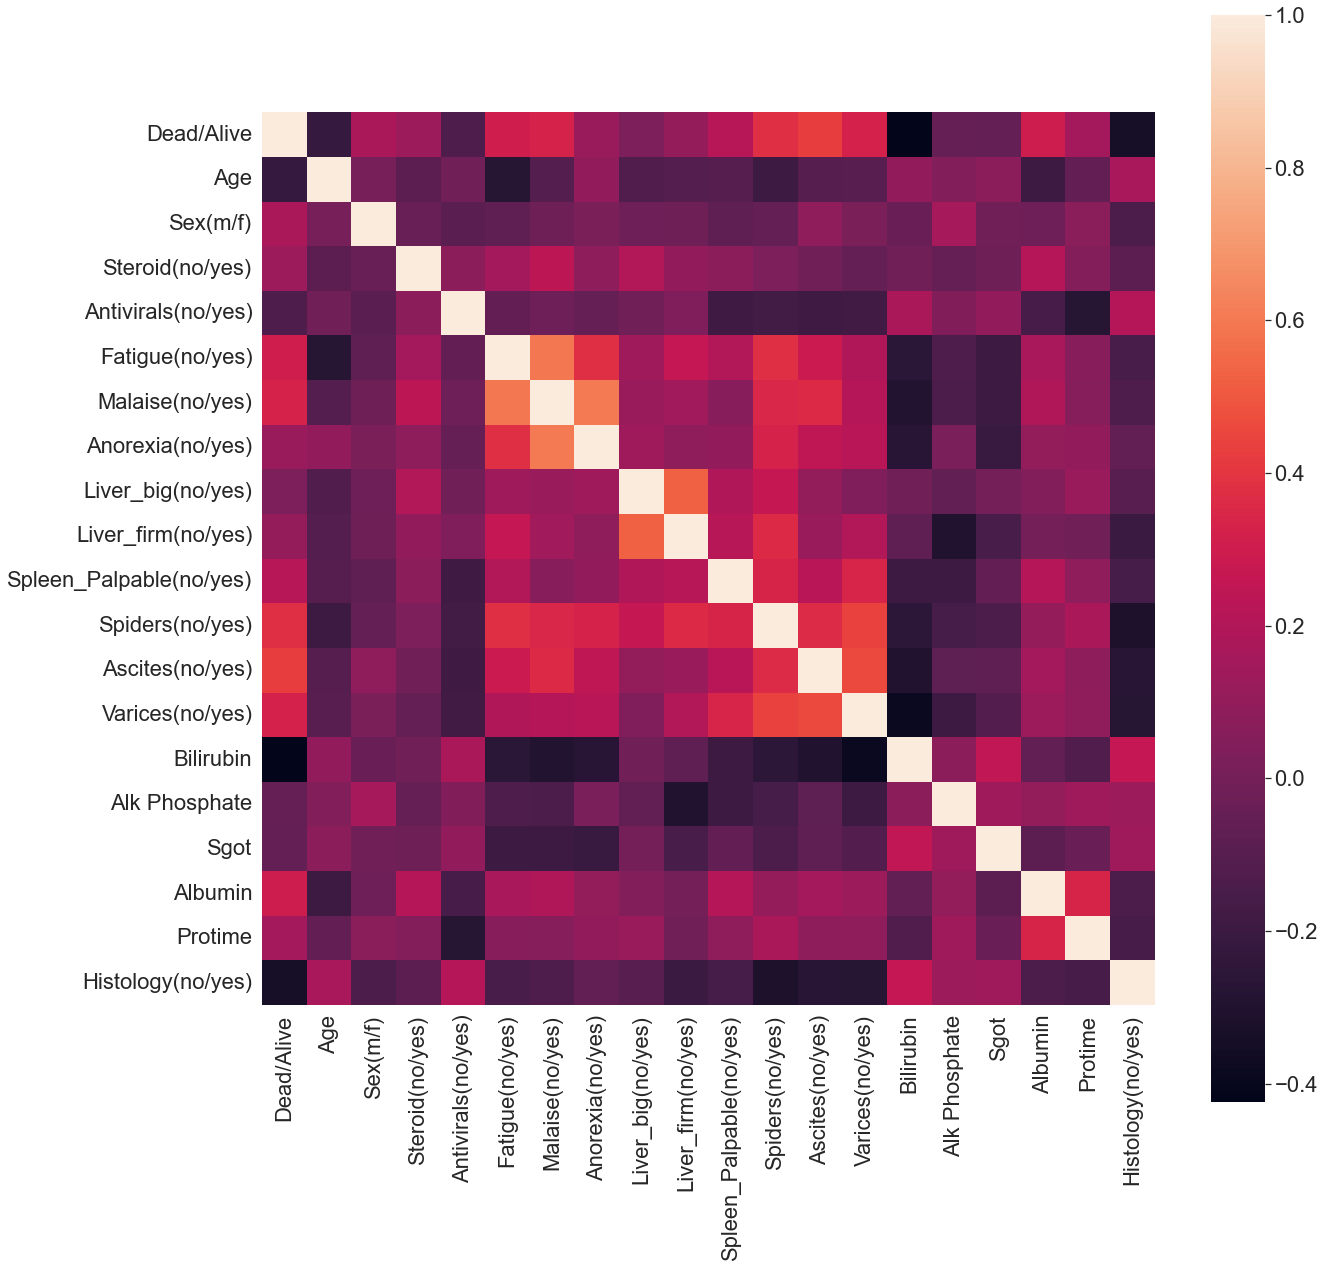

In [18]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True);

<AxesSubplot:>

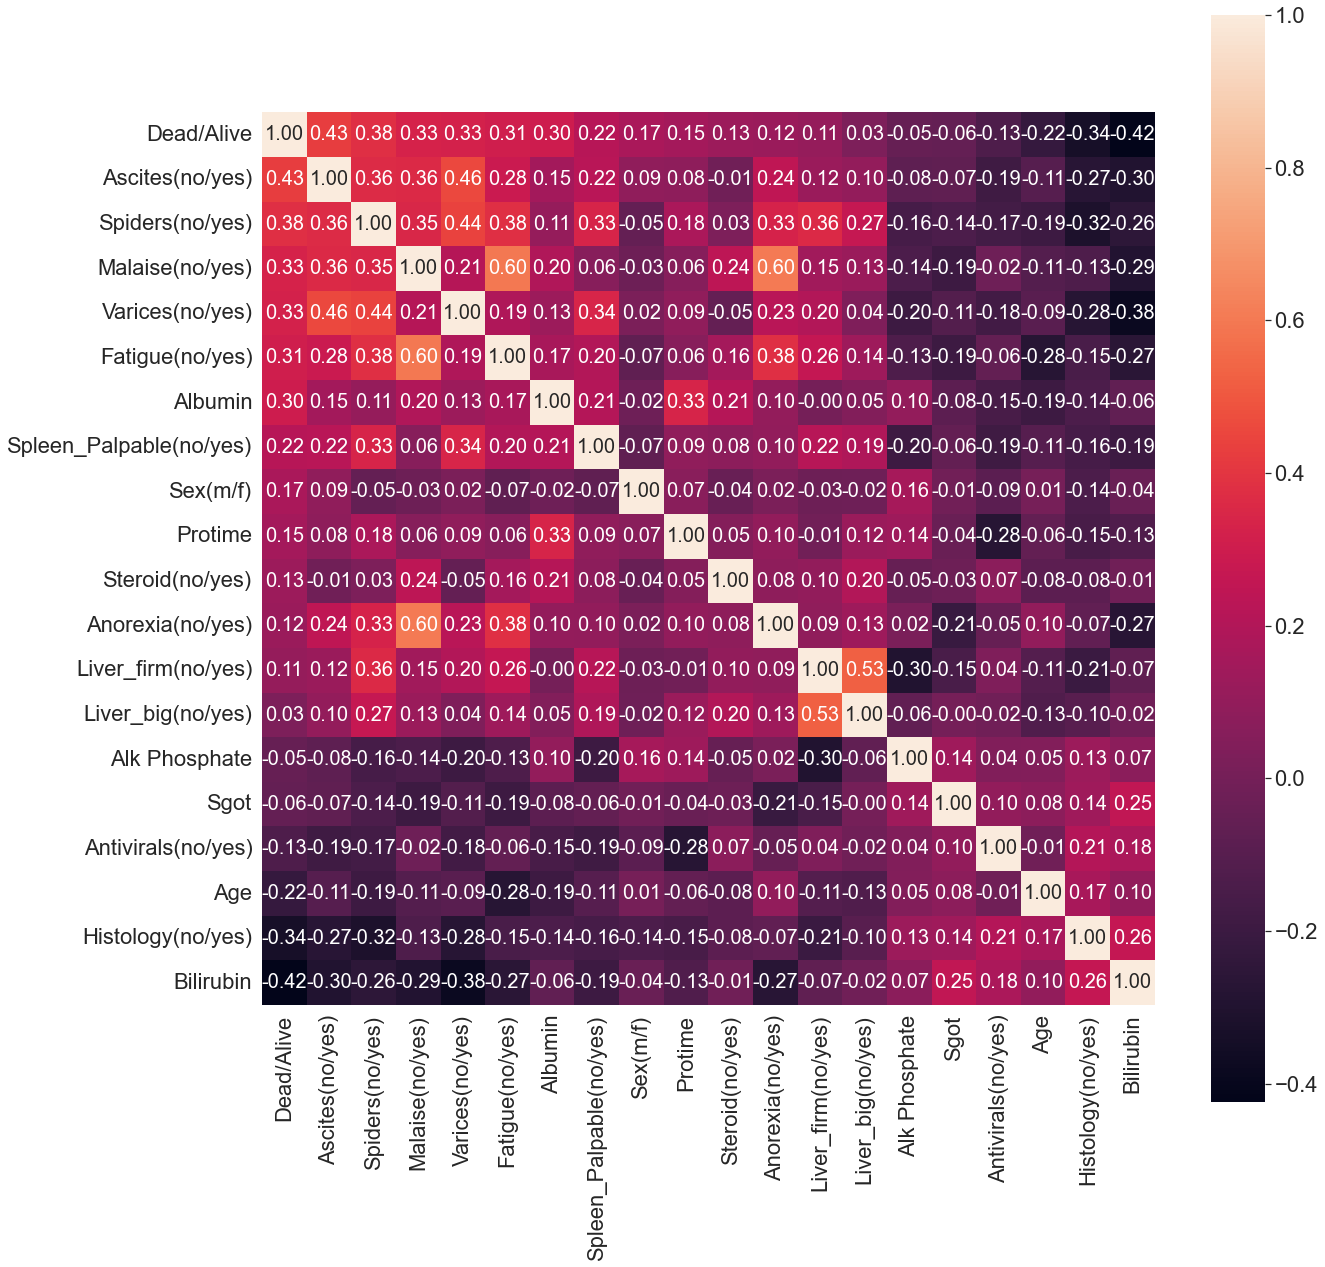

In [19]:
k = 20
cols = corrmat.nlargest(k, 'Dead/Alive')['Dead/Alive'].index
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale=2)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)


In [20]:
#remove correlation coef between 0.3 to -0.3
data = data.drop(data.columns[[1,2,3,4,7,8,9,10,15,16,18]], axis =1)
data.head()

,Dead/Alive,Fatigue(no/yes),Malaise(no/yes),Spiders(no/yes),Ascites(no/yes),Varices(no/yes),Bilirubin,Albumin,Histology(no/yes)
0,1,2,2,2,2,2,1.0,4.0,1
1,1,1,2,2,2,2,0.9,3.5,1
2,1,1,2,2,2,2,0.7,4.0,1
3,1,2,2,2,2,2,0.7,4.0,1
4,1,2,2,2,2,2,1.0,4.0,1


In [22]:
data.to_csv(r'hepatitis_clean.csv', index = None, header=True)